In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split,  GridSearchCV, TimeSeriesSplit
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge


In [3]:
sp500 = pd.read_csv('../Data/sp500_main.csv')
macro = pd.read_csv('../Data/macro_data.csv')

In [4]:
macro= macro.set_index('Date')
sp500 = sp500.set_index('Date')

In [5]:
# Loop through each unique ticker (stock) in the DataFrame
indicator = pd.DataFrame()
for ticker in sp500.columns:
    # Calculate SMAs 
    indicator[f'{ticker}_SMA3'] = sp500[ticker].rolling(window=3).mean()
    indicator[f'{ticker}_SMA20'] = sp500[ticker].rolling(window=20).mean()
    indicator[f'{ticker}_SMA50'] = sp500[ticker].rolling(window=50).mean()
    indicator[f'{ticker}_SMA100'] = sp500[ticker].rolling(window=100).mean()
    indicator[f'{ticker}_SMA200'] = sp500[ticker].rolling(window=200).mean()
    
    # Calculate EMA
    indicator[f'{ticker}_EMA3'] = sp500[ticker].ewm(span=3, adjust=False).mean()
    indicator[f'{ticker}_EMA12'] = sp500[ticker].ewm(span=12, adjust=False).mean()
    indicator[f'{ticker}_EMA26'] = sp500[ticker].ewm(span=26, adjust=False).mean()
    
    # Calculate MACD
    indicator[f'{ticker}_MACD'] = indicator[f'{ticker}_EMA12'] - indicator[f'{ticker}_EMA26']
    
    # Calculate Signal line (9-day EMA of the MACD)
    indicator[f'{ticker}_signal'] = indicator[f'{ticker}_MACD'].ewm(span=9, adjust=False).mean()
    
    # Concatenate each ticker's results into the final indicator DataFrame
    indicator = pd.concat([indicator, sp500], axis=1)

In [6]:
indicator = indicator.dropna()

In [7]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
# Merge all the files that have X-variable (features)
features_df = pd.merge(macro, indicator, on='Date', how='outer')
features_df = features_df.fillna(method='ffill').dropna()

In [8]:
# drop the same column names
features_df = features_df.loc[:, ~features_df.columns.duplicated()]

In [9]:
# Make the rows number the same with target and features files
# set the index to the format Datetime
sp500.index = pd.to_datetime(sp500.index)
features_df.index = pd.to_datetime(features_df.index)

# Align the two DataFrames by finding the intersection of their indices
common_index = sp500.index.intersection(features_df.index)

# Reindex both DataFrames to the common index
sp500 = sp500.loc[common_index]
features_df = features_df.loc[common_index]

In [13]:
features_df.shape, sp500.shape

((2556, 224), (2556, 20))

In [19]:
# define X and y
X = features_df 
y = sp500 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

Training set shape for AAPL: X_train: (2196, 224), y_train: (2196,)
Testing set shape for AAPL: X_test: (360, 224), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for AAPL: {'alpha': 0.01}
Performance for AAPL - RMSE: 0.0012646097250510367


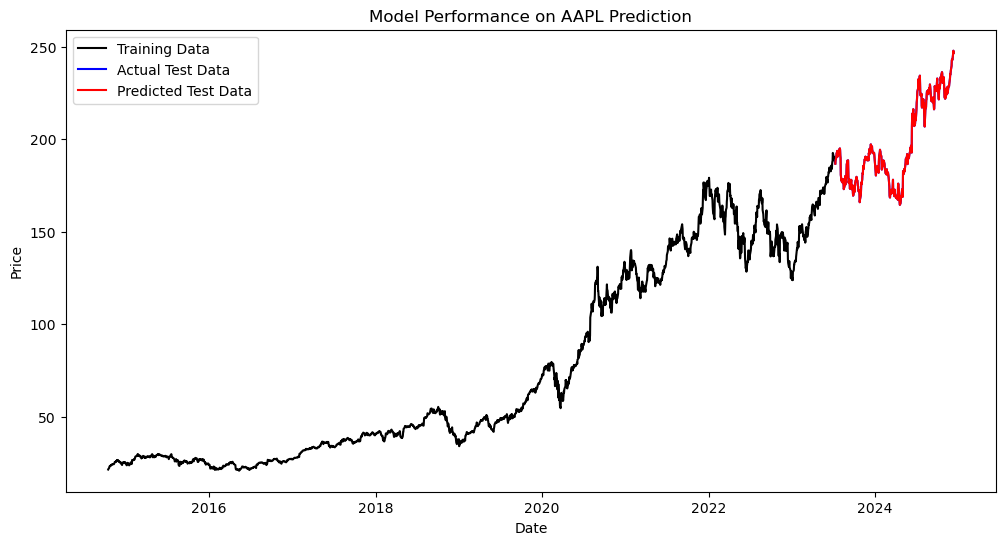

Training set shape for AMZN: X_train: (2196, 224), y_train: (2196,)
Testing set shape for AMZN: X_test: (360, 224), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for AMZN: {'alpha': 0.1}
Performance for AMZN - RMSE: 0.0041160136312292815


<Figure size 640x480 with 0 Axes>

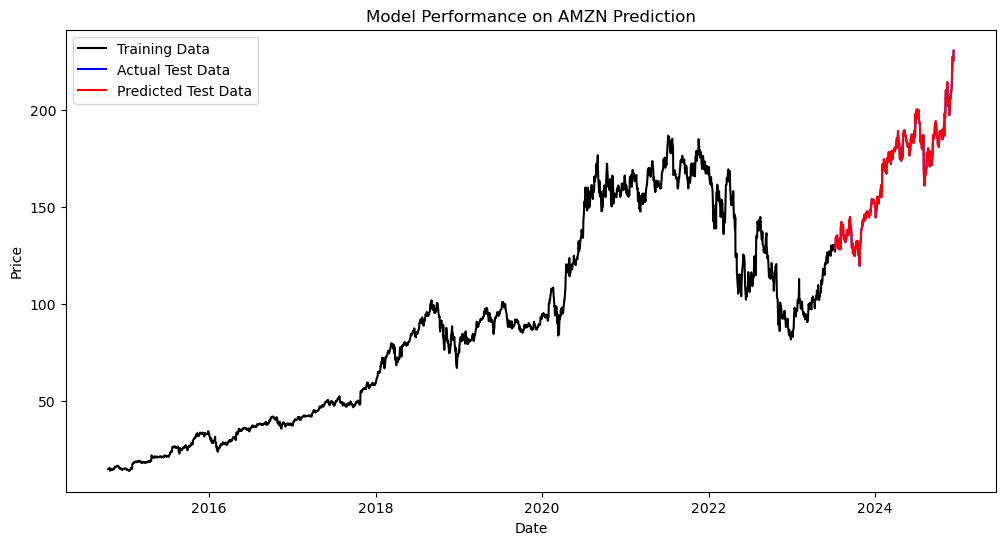

Training set shape for AVGO: X_train: (2196, 224), y_train: (2196,)
Testing set shape for AVGO: X_test: (360, 224), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for AVGO: {'alpha': 0.01}
Performance for AVGO - RMSE: 0.0026599186303239383


<Figure size 640x480 with 0 Axes>

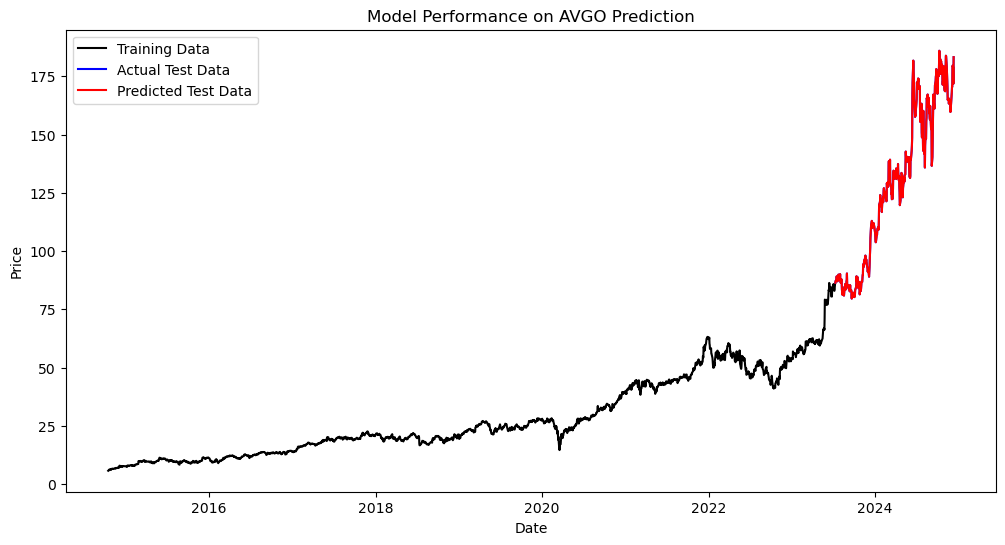

Training set shape for COST: X_train: (2196, 224), y_train: (2196,)
Testing set shape for COST: X_test: (360, 224), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for COST: {'alpha': 0.01}
Performance for COST - RMSE: 0.00029372200791144695


<Figure size 640x480 with 0 Axes>

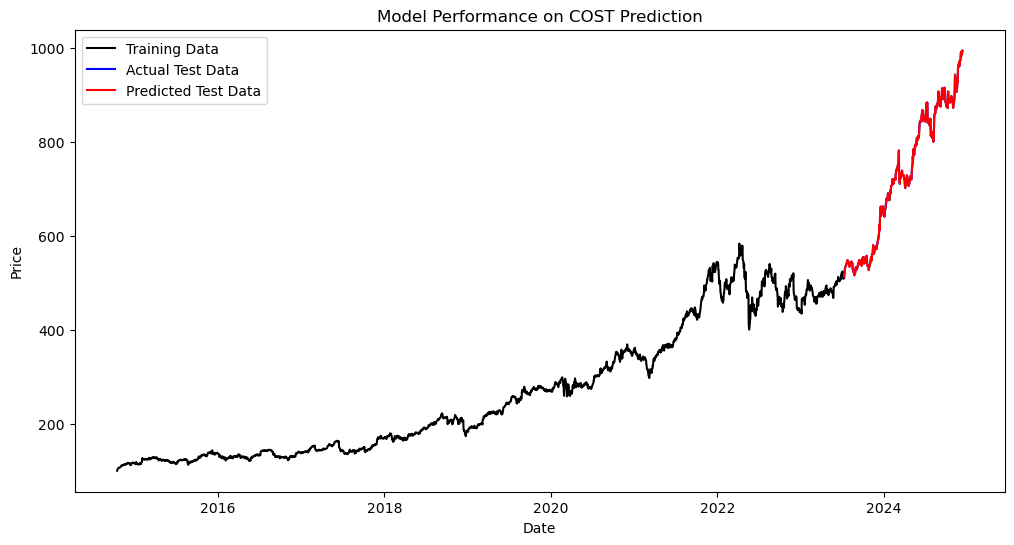

Training set shape for GOOG: X_train: (2196, 224), y_train: (2196,)
Testing set shape for GOOG: X_test: (360, 224), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for GOOG: {'alpha': 0.01}
Performance for GOOG - RMSE: 0.0019308181090105956


<Figure size 640x480 with 0 Axes>

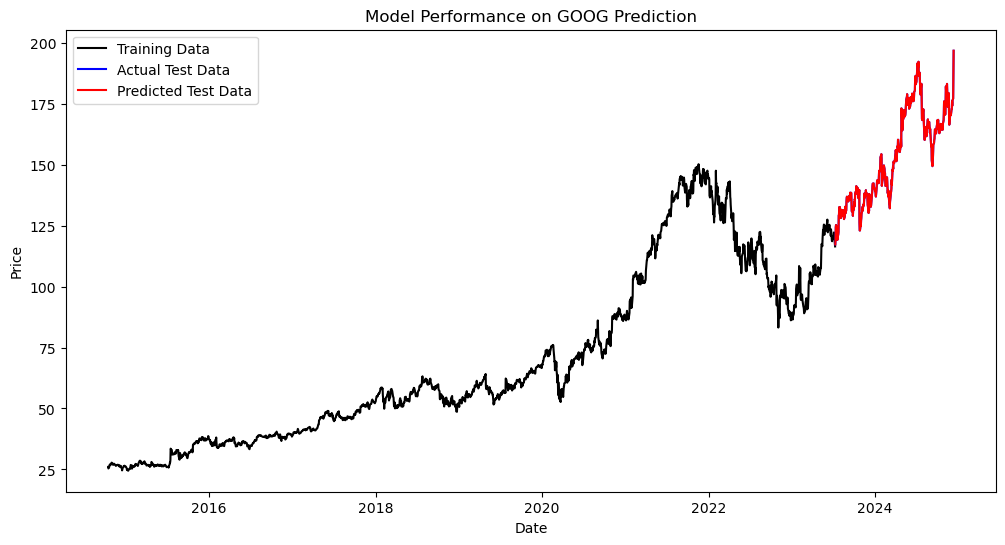

Training set shape for GOOGL: X_train: (2196, 224), y_train: (2196,)
Testing set shape for GOOGL: X_test: (360, 224), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for GOOGL: {'alpha': 0.01}
Performance for GOOGL - RMSE: 0.003983910985290869


<Figure size 640x480 with 0 Axes>

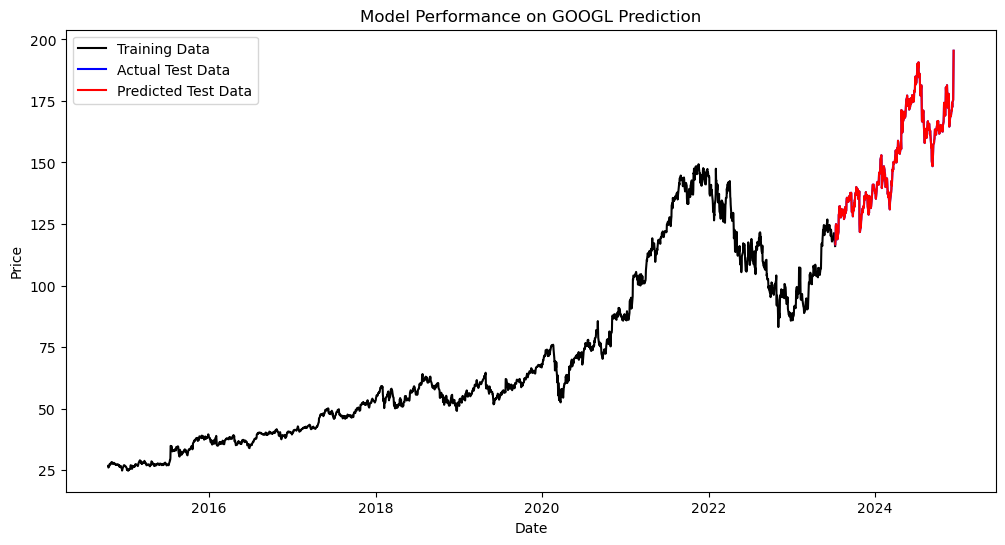

Training set shape for HD: X_train: (2196, 224), y_train: (2196,)
Testing set shape for HD: X_test: (360, 224), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for HD: {'alpha': 0.01}
Performance for HD - RMSE: 0.0004373880720203047


<Figure size 640x480 with 0 Axes>

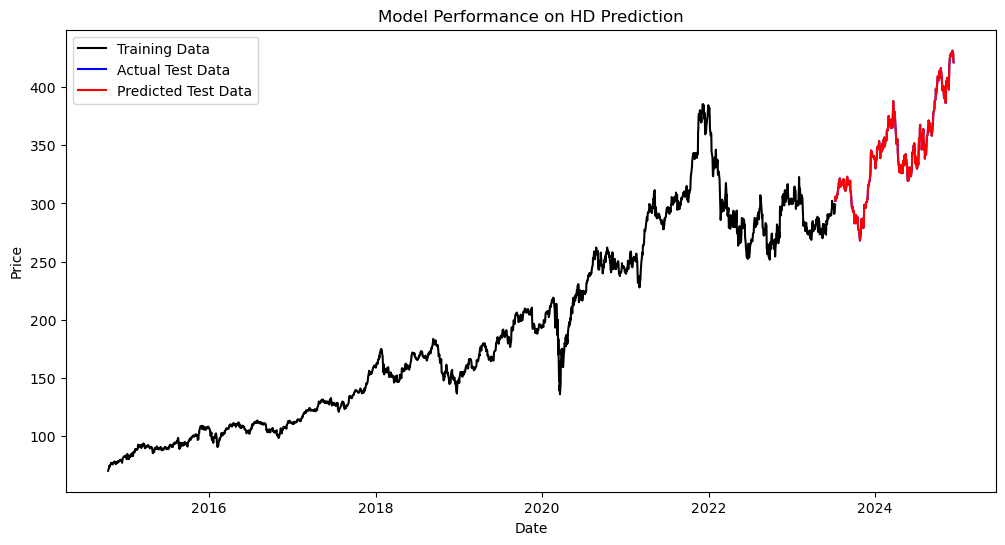

Training set shape for JPM: X_train: (2196, 224), y_train: (2196,)
Testing set shape for JPM: X_test: (360, 224), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for JPM: {'alpha': 0.01}
Performance for JPM - RMSE: 0.0004882898368841789


<Figure size 640x480 with 0 Axes>

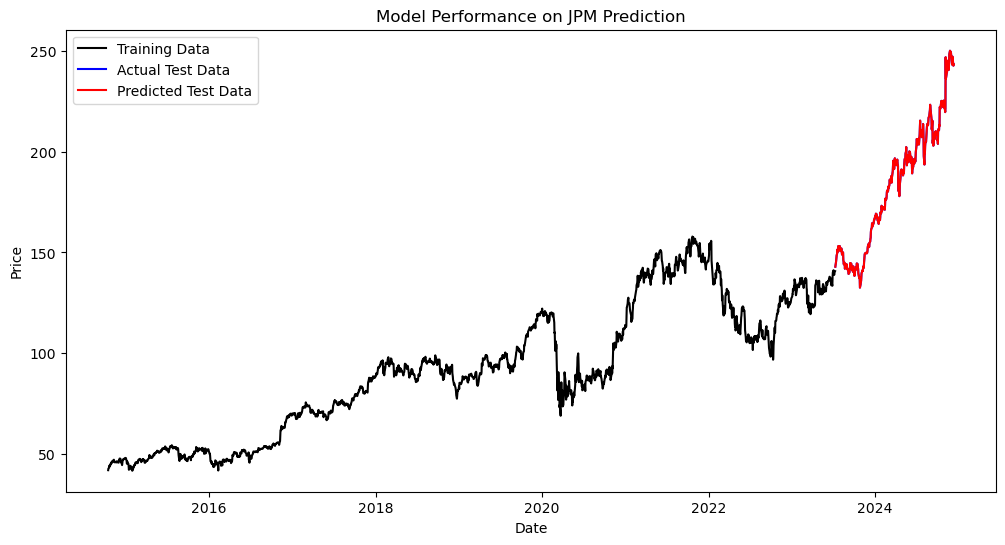

Training set shape for LLY: X_train: (2196, 224), y_train: (2196,)
Testing set shape for LLY: X_test: (360, 224), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for LLY: {'alpha': 0.01}
Performance for LLY - RMSE: 0.00040135107226785434


<Figure size 640x480 with 0 Axes>

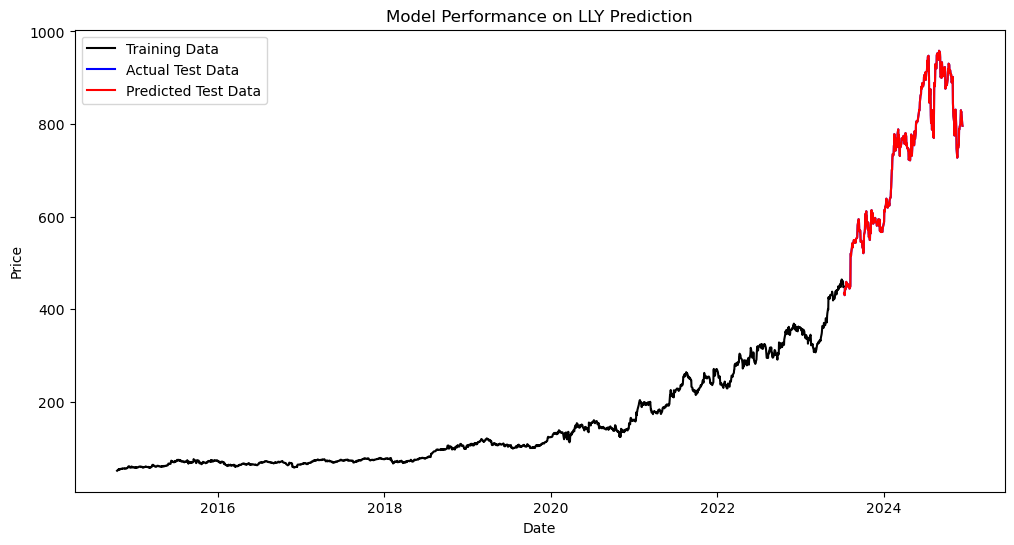

Training set shape for MA: X_train: (2196, 224), y_train: (2196,)
Testing set shape for MA: X_test: (360, 224), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for MA: {'alpha': 0.01}
Performance for MA - RMSE: 0.0006580812049421816


<Figure size 640x480 with 0 Axes>

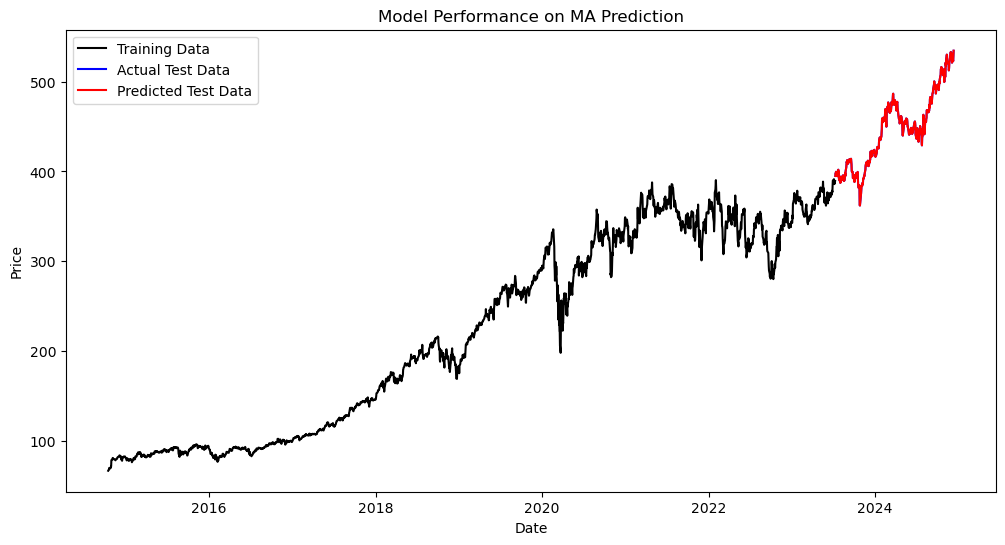

Training set shape for META: X_train: (2196, 224), y_train: (2196,)
Testing set shape for META: X_test: (360, 224), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for META: {'alpha': 0.01}
Performance for META - RMSE: 0.00013393163793198803


<Figure size 640x480 with 0 Axes>

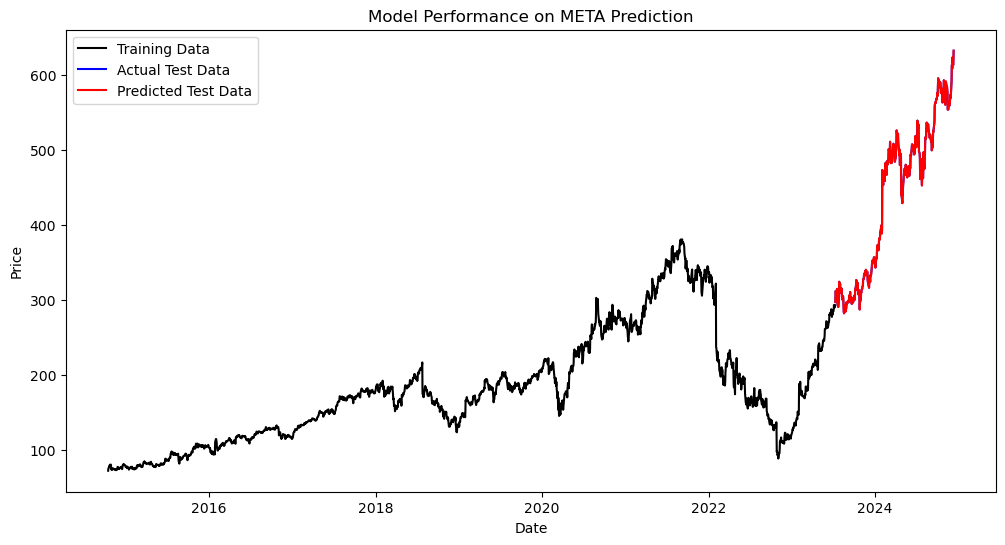

Training set shape for MSFT: X_train: (2196, 224), y_train: (2196,)
Testing set shape for MSFT: X_test: (360, 224), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for MSFT: {'alpha': 0.01}
Performance for MSFT - RMSE: 0.0006261942138975058


<Figure size 640x480 with 0 Axes>

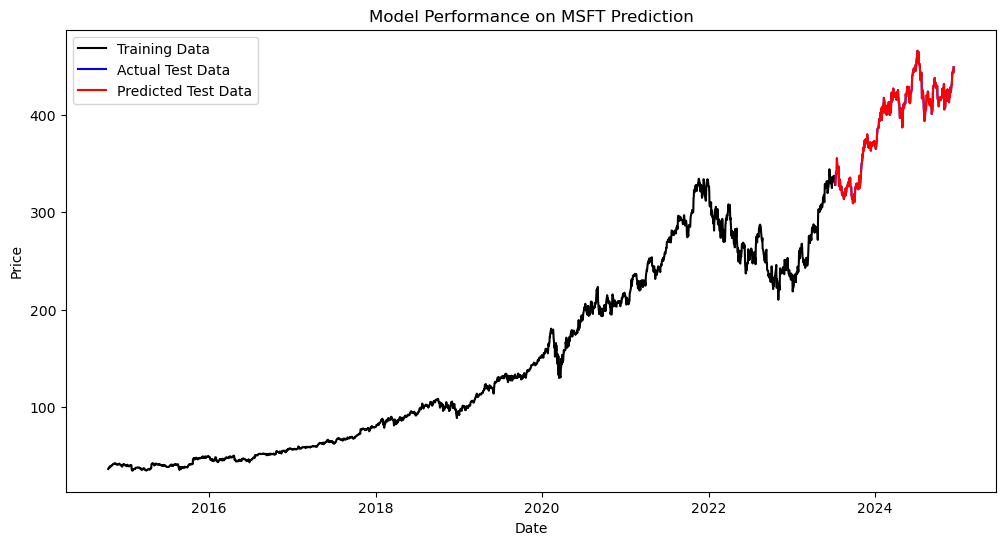

Training set shape for NVDA: X_train: (2196, 224), y_train: (2196,)
Testing set shape for NVDA: X_test: (360, 224), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for NVDA: {'alpha': 0.1}
Performance for NVDA - RMSE: 0.029164354607315656


<Figure size 640x480 with 0 Axes>

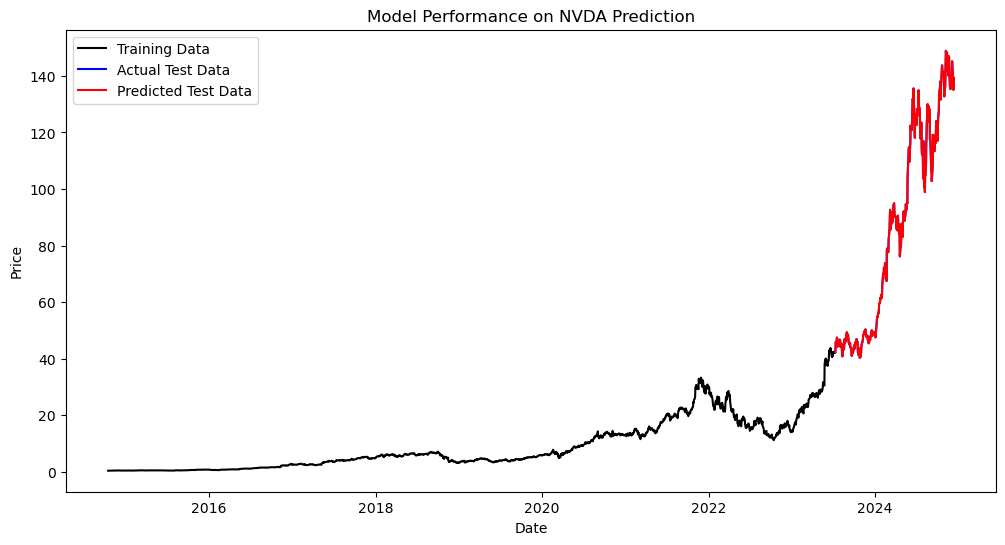

Training set shape for ORCL: X_train: (2196, 224), y_train: (2196,)
Testing set shape for ORCL: X_test: (360, 224), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for ORCL: {'alpha': 0.01}
Performance for ORCL - RMSE: 0.0007269126532528691


<Figure size 640x480 with 0 Axes>

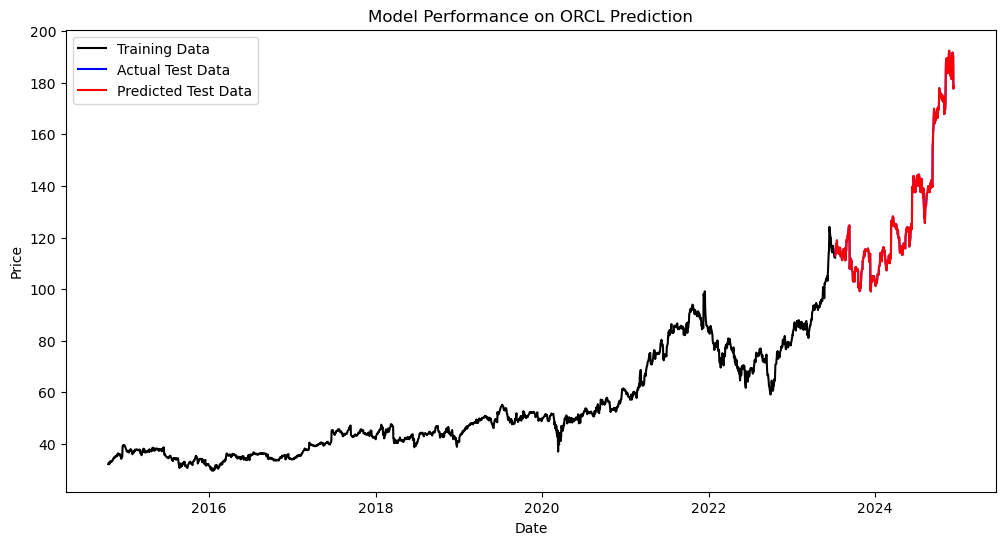

Training set shape for PG: X_train: (2196, 224), y_train: (2196,)
Testing set shape for PG: X_test: (360, 224), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for PG: {'alpha': 0.01}
Performance for PG - RMSE: 0.002213541111446298


<Figure size 640x480 with 0 Axes>

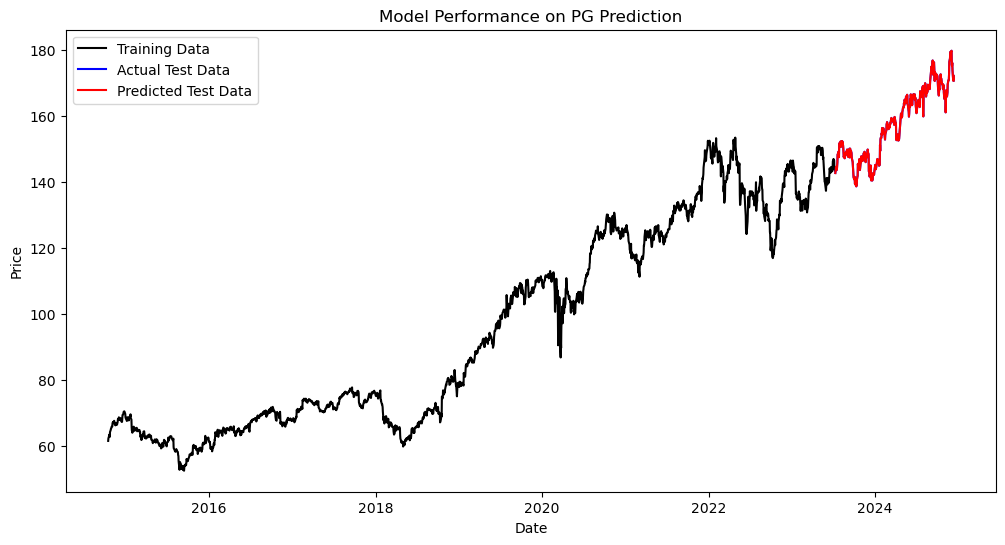

Training set shape for TSLA: X_train: (2196, 224), y_train: (2196,)
Testing set shape for TSLA: X_test: (360, 224), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for TSLA: {'alpha': 0.01}
Performance for TSLA - RMSE: 0.0008680809193144284


<Figure size 640x480 with 0 Axes>

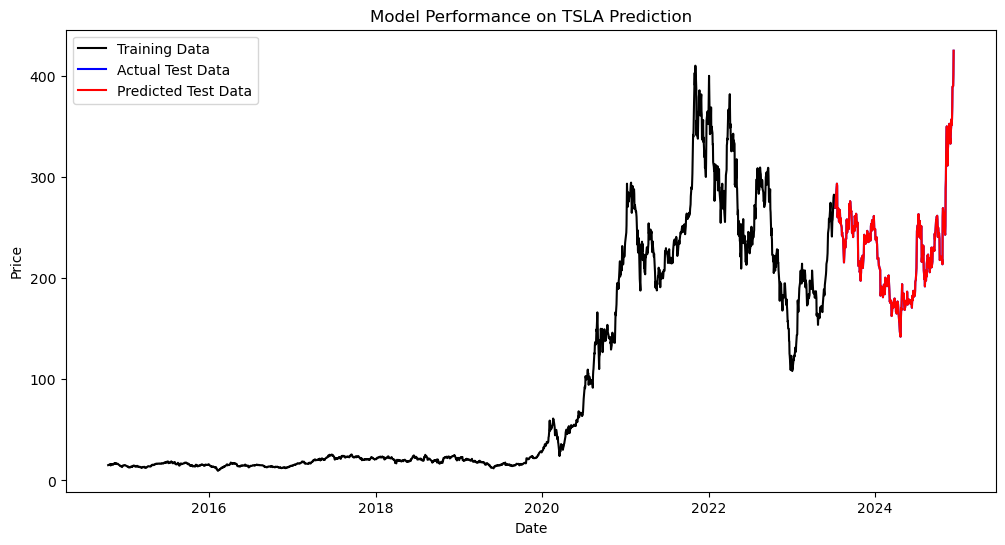

Training set shape for UNH: X_train: (2196, 224), y_train: (2196,)
Testing set shape for UNH: X_test: (360, 224), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for UNH: {'alpha': 0.01}
Performance for UNH - RMSE: 0.0004414073711575836


<Figure size 640x480 with 0 Axes>

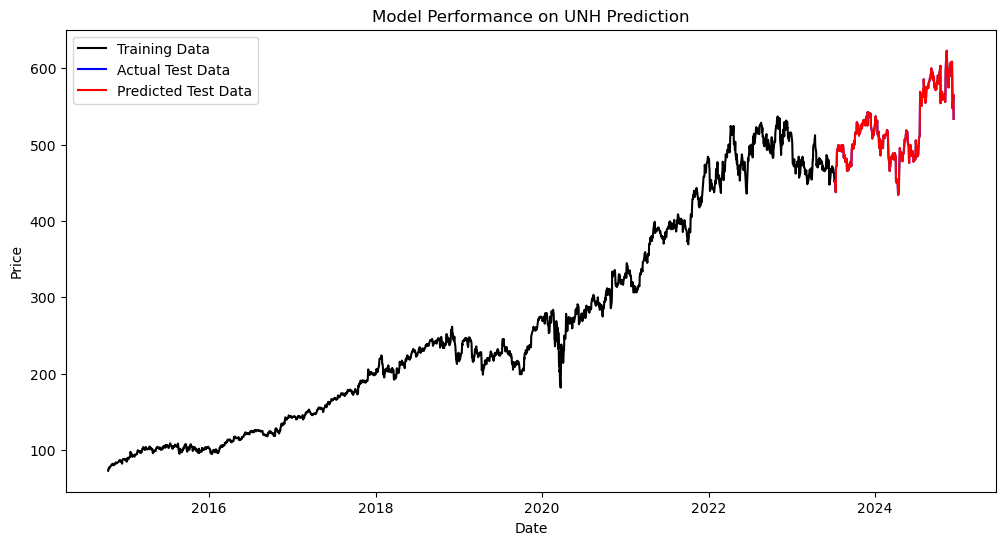

Training set shape for V: X_train: (2196, 224), y_train: (2196,)
Testing set shape for V: X_test: (360, 224), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for V: {'alpha': 0.01}
Performance for V - RMSE: 0.0003628307488940339


<Figure size 640x480 with 0 Axes>

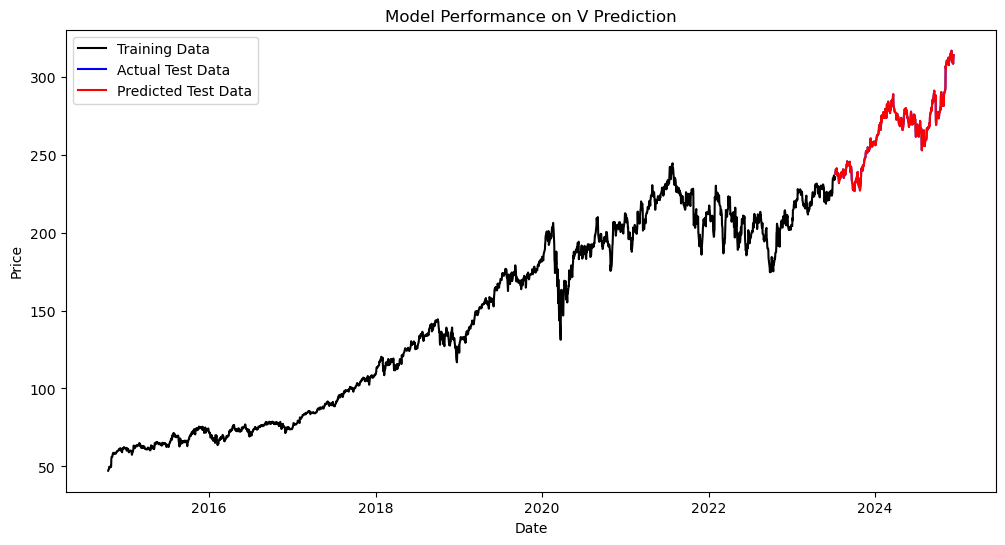

Training set shape for WMT: X_train: (2196, 224), y_train: (2196,)
Testing set shape for WMT: X_test: (360, 224), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for WMT: {'alpha': 0.01}
Performance for WMT - RMSE: 0.0015598233497916068


<Figure size 640x480 with 0 Axes>

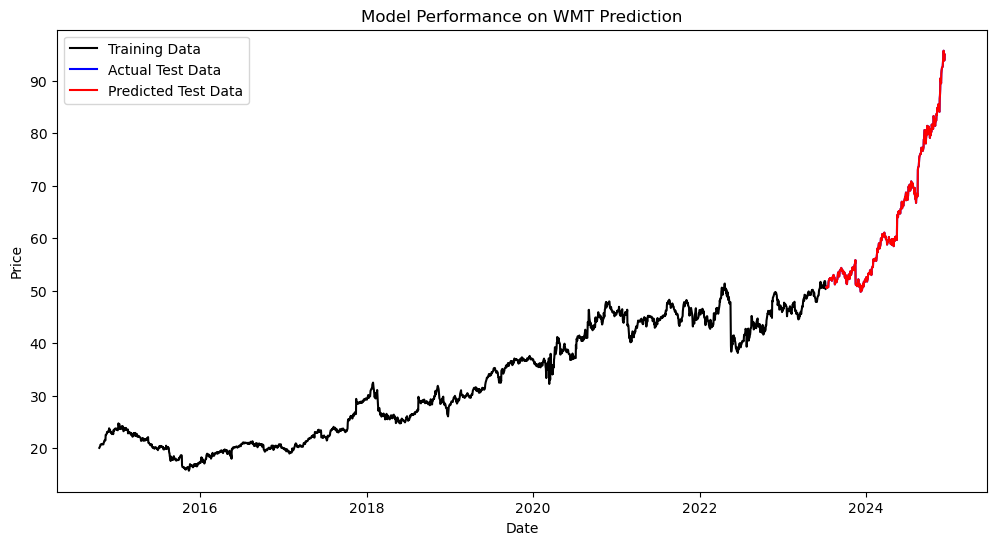

Training set shape for XOM: X_train: (2196, 224), y_train: (2196,)
Testing set shape for XOM: X_test: (360, 224), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for XOM: {'alpha': 0.01}
Performance for XOM - RMSE: 0.0005618195867187336


<Figure size 640x480 with 0 Axes>

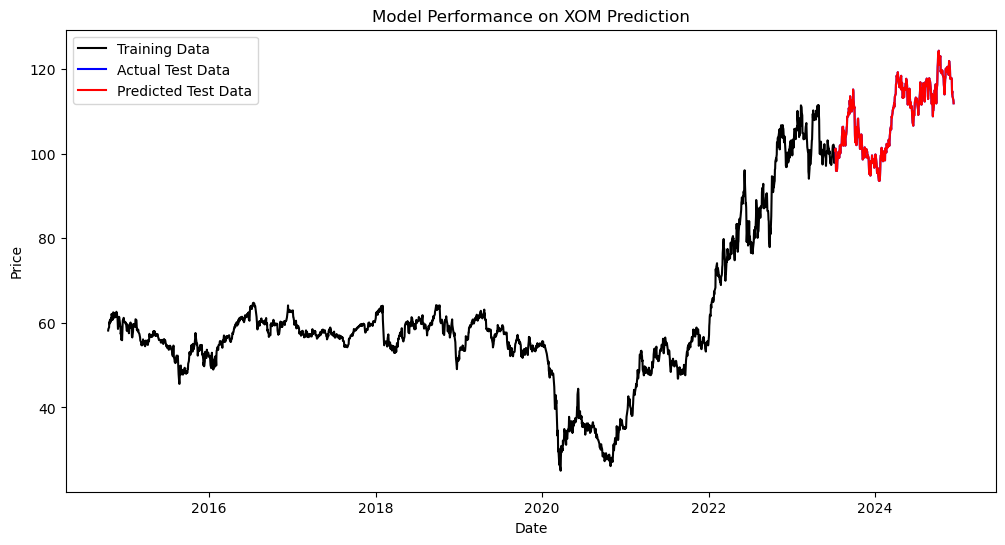

<Figure size 640x480 with 0 Axes>

In [33]:
# Initialize dictionaries to store results
results = {}

# Define the hyperparameter grid for GridSearchCV (alpha for regularization strength)
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]  # Regularization strength
}

# Fixed test size for the last 360 rows
test_size = 360

# Time Series Split for cross-validation (preserves order)
tscv = TimeSeriesSplit(n_splits=3)

# Loop through each stock in the sp500 DataFrame
for stock in sp500.columns:
    
    # Prepare the target (stock price) for each stock
    y_stock = sp500[stock]  # Stock price for this particular stock
    
    # Define training and testing sets
    X_train = features_df.iloc[:-test_size, :]
    X_test = features_df.iloc[-test_size:, :]
    y_train = y_stock.iloc[:-test_size]
    y_test = y_stock.iloc[-test_size:]
    
    # Print dataset shapes
    print(f"Training set shape for {stock}: X_train: {X_train.shape}, y_train: {y_train.shape}")
    print(f"Testing set shape for {stock}: X_test: {X_test.shape}, y_test: {y_test.shape}")
    
    # Initialize Ridge Regression model
    ridge_reg = Ridge()

    # Perform Grid Search with TimeSeriesSplit cross-validation
    grid_search = GridSearchCV(estimator=ridge_reg, 
                               param_grid=param_grid, 
                               cv=tscv, 
                               scoring='neg_mean_squared_error', 
                               verbose=1)
    
    # Fit the GridSearchCV model to the training data
    grid_search.fit(X_train, y_train)
    
    # Get the best hyperparameters from the grid search
    best_params = grid_search.best_params_
    print(f"Best Hyperparameters for {stock}: {best_params}")
    
    # Use the best estimator found by GridSearchCV to make predictions
    best_model = grid_search.best_estimator_
    
    # Make predictions on the test data
    y_pred = best_model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    print(f'Performance for {stock} - RMSE: {rmse}')
    
    # Store the results (model, predictions, evaluation metrics)
    results[stock] = {
        'model': best_model, 
        'predictions': y_pred,
        'mse': mse,
        'rmse': rmse
    }
    
    # Combine training and testing actual prices for visualization
    plt.figure(figsize=(12, 6))
    
    # Plot training data (black)
    plt.plot(y_stock.index[:-test_size], y_stock.values[:-test_size], color='black', label='Training Data')
    
    # Plot actual test data (blue)
    plt.plot(y_stock.index[-test_size:], y_stock.values[-test_size:], color='blue', label='Actual Test Data')
    
    # Overlay the predicted prices for the test set (red)
    plt.plot(y_test.index, y_pred, color='red', label='Predicted Test Data')
    
    # Add title and labels
    plt.title(f'Model Performance on {stock} Prediction')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    
    # Display the plot
    plt.show()

    # Save the plot
    plt.savefig(f'../images/{stock}_ridge_prediction.png', format='png')
